# Mašinsko učenje
## Projekat 1 - Nadgledano učenje
### Nikola Vukotić 1401,  Željko Balanović 1533
### Prognoza rizika od dijabetesa
#### Dataset: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
#### Klasifikacija
#### Google Search : diabetes site:archive.ics.uci.edu/ml site:ics.uci.edu

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sn
import math
import statistics
import scipy.stats

In [3]:
data_df = pd.read_csv('diabetes_data.csv')

In [4]:
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
data_df.shape

(520, 17)

In [7]:
result = scipy.stats.describe(data_df["Age"], ddof=1, bias=False)
result

DescribeResult(nobs=520, minmax=(16, 90), mean=48.02884615384615, variance=147.65812583370388, skewness=0.3293593578272701, kurtosis=-0.19170941407070163)

In [8]:
data_df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
data_df.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [10]:
print('Maximum of column Age: ', data_df['Age'].max())
print('Minimum of column Age: ', data_df['Age'].min())
print('Mean of column Age: ', data_df['Age'].mean())
print('Count of column Age: ', data_df['Age'].count())

Maximum of column Age:  90
Minimum of column Age:  16
Mean of column Age:  48.02884615384615
Count of column Age:  520


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

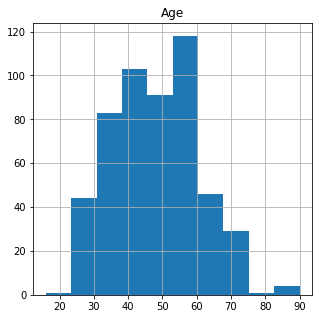

In [11]:
data_df.hist(figsize = (5,5))

## Konsultacije: 30.11.2022.
### balansiranje podataka obavezno proveriti
### OUTLIERI - pronaci i videti kako ih se resiti
### problem: mala kolicina podataka, za kasnije faze moze biti problem, da se shvati
### koji algoritam daje najbolje resenje, takodje moze biti problematicno kod redukcije feature-a

### Izbacivanje duplikata

In [12]:
duplicates = data_df.duplicated()
dropped = data_df.drop_duplicates()
dropped.shape

(251, 17)

### Obrada kategorickih podataka

In [13]:
data_df['Gender'] = [1 if gender=='Male' else 0 for gender in data_df.Gender]
data_df['class'] = [1 if class_att=='Positive' else 0 for class_att in data_df.get('class')]

columns_name = list(data_df)
columns_name = columns_name[2:16]

for col in columns_name:
    data_df[col] = [1 if b=='Yes' else 0 for b in data_df.get(col)]

data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Obrada nedostajucih podataka - Zakljucak: nema takvih:

In [14]:
missing = data_df.isna()
missing

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
missing.sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [17]:
anymissing = missing.any(axis=1)
anymissing

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Length: 520, dtype: bool

In [18]:
data_df[anymissing]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


<AxesSubplot:>

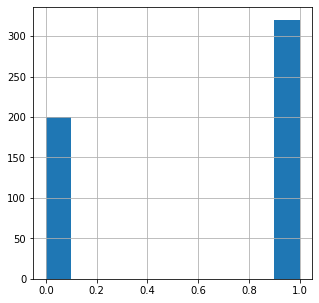

In [19]:
data_df['class'].hist(figsize = (5,5))

### Deskriptivna analiza

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

### Measure of Center: Mean and Median

In [21]:
mean = data_df.mean()
print(mean)

Age                   48.028846
Gender                 0.630769
Polyuria               0.496154
Polydipsia             0.448077
sudden weight loss     0.417308
weakness               0.586538
Polyphagia             0.455769
Genital thrush         0.223077
visual blurring        0.448077
Itching                0.486538
Irritability           0.242308
delayed healing        0.459615
partial paresis        0.430769
muscle stiffness       0.375000
Alopecia               0.344231
Obesity                0.169231
class                  0.615385
dtype: float64


In [22]:
median = data_df.median()
print(median)

Age                   47.5
Gender                 1.0
Polyuria               0.0
Polydipsia             0.0
sudden weight loss     0.0
weakness               1.0
Polyphagia             0.0
Genital thrush         0.0
visual blurring        0.0
Itching                0.0
Irritability           0.0
delayed healing        0.0
partial paresis        0.0
muscle stiffness       0.0
Alopecia               0.0
Obesity                0.0
class                  1.0
dtype: float64


### Measures of Variabillity

#### Standard Deviation

In [31]:
std_deviation = data_df.std()
print(std_deviation)

Age                   12.151466
Gender                 0.483061
Polyuria               0.500467
Polydipsia             0.497776
sudden weight loss     0.493589
weakness               0.492928
Polyphagia             0.498519
Genital thrush         0.416710
visual blurring        0.497776
Itching                0.500300
Irritability           0.428892
delayed healing        0.498846
partial paresis        0.495661
muscle stiffness       0.484589
Alopecia               0.475574
Obesity                0.375317
class                  0.486973
dtype: float64


#### Variance

In [23]:
variance = data_df.var()
print(variance)

Age                   147.658126
Gender                  0.233348
Polyuria                0.250467
Polydipsia              0.247780
sudden weight loss      0.243631
weakness                0.242978
Polyphagia              0.248522
Genital thrush          0.173648
visual blurring         0.247780
Itching                 0.250300
Irritability            0.183948
delayed healing         0.248848
partial paresis         0.245680
muscle stiffness        0.234827
Alopecia                0.226171
Obesity                 0.140863
class                   0.237142
dtype: float64


#### Skewness 
##### Na koju stranu je iskrivljenje, 0 je normalna distribucija

In [25]:
skewness = data_df.skew()
print(skewness)

Age                   0.329359
Gender               -0.543509
Polyuria              0.015430
Polydipsia            0.209426
sudden weight loss    0.336359
weakness             -0.352476
Polyphagia            0.178134
Genital thrush        1.334223
visual blurring       0.209426
Itching               0.054022
Irritability          1.206305
delayed healing       0.162537
partial paresis       0.280426
muscle stiffness      0.517893
Alopecia              0.657608
Obesity               1.769420
class                -0.475715
dtype: float64


#### Summary

In [27]:
data_df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribucija podataka - Graficki prikaz

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


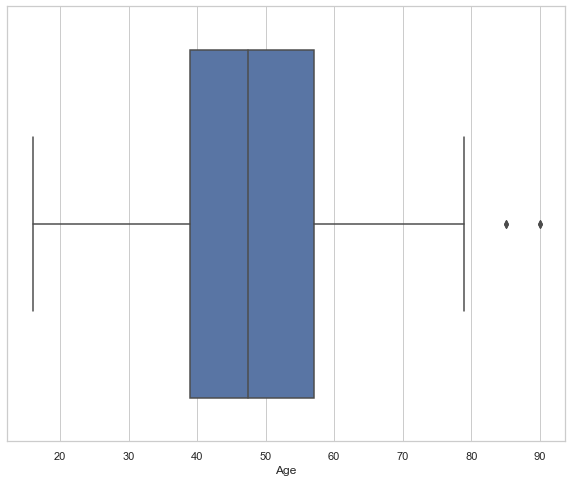

In [35]:
%matplotlib inline

sn.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sn.boxplot(x='Age', data=data_df, orient="v")

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

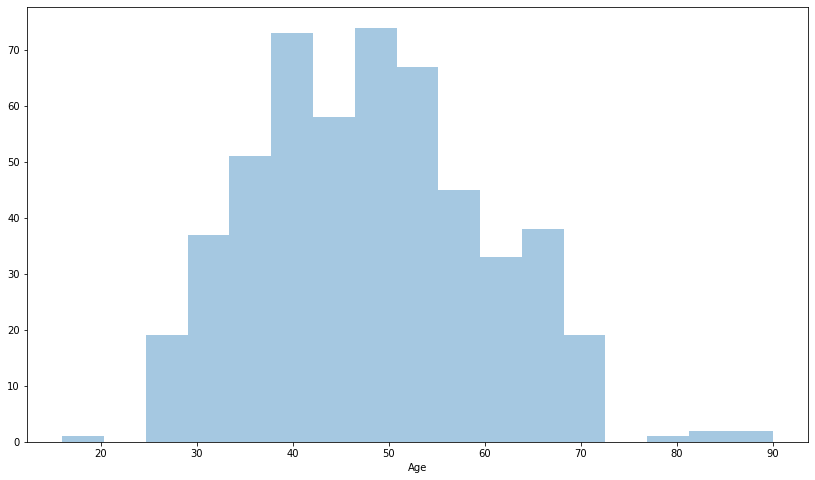

In [29]:
filter_data = data_df.dropna(subset=['Age'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['Age'], kde=False)

### Outlejeri - detekcija

In [31]:
feature = data_df["Age"]

q1, q3 = np.percentile(feature, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliers = np.where((feature > upper_bound) | (feature < lower_bound))

data_df.iloc[outliers[0]]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
185,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


## Balansiranost i resavanje problema:

<AxesSubplot:ylabel='class'>

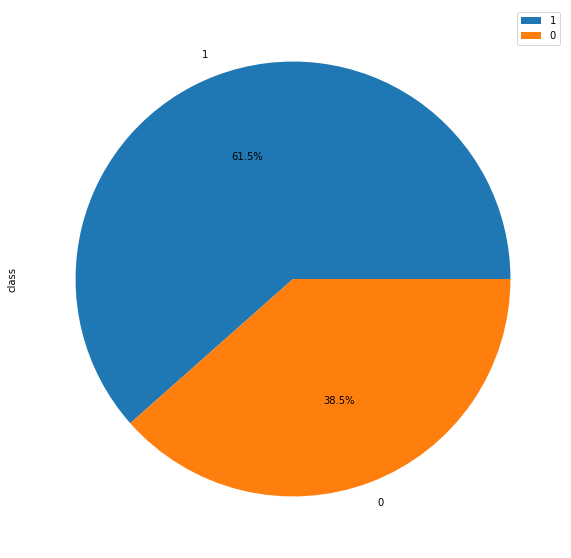

In [32]:
type_counts = data_df['class'].value_counts()
df2 = pd.DataFrame({'class': type_counts})
df2.plot.pie(y='class', figsize=(10,10), autopct='%1.1f%%')

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class'>

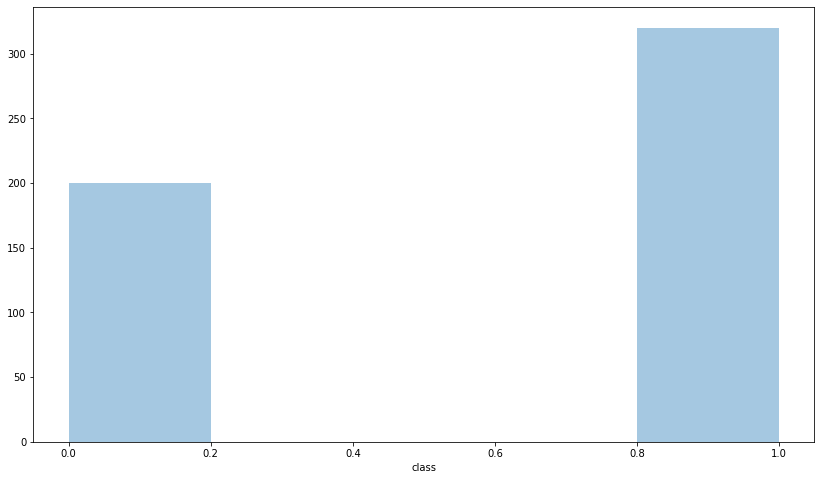

In [34]:
filter_data = data_df.dropna(subset=['class'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['class'], kde=False)

Negative:  200
Positive:  320


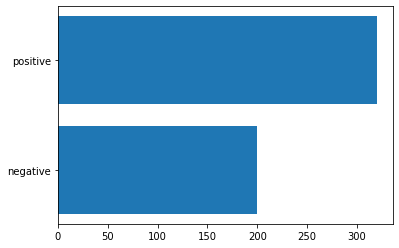

In [36]:
positive_count, negative_count = data_df['class'].value_counts()
plt.barh(["negative","positive"], [negative_count, positive_count])
print("Negative:  "+ str(negative_count))
print("Positive:  "+ str(positive_count))

## Underseampling

Negative:  200
Positive:  200


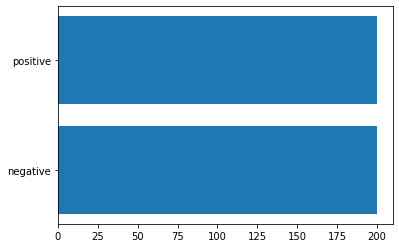

In [37]:
from sklearn.utils import resample

df_majority_US = data_df[data_df['class'] == 1]
df_minority_US = data_df[data_df['class'] == 0]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = negative_count, random_state = 0)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_positive_count, undersampled_negative_count = df_undersampled['class'].value_counts()

plt.barh(["negative","positive"], [undersampled_negative_count, undersampled_positive_count])
print("Negative:  "+ str(undersampled_negative_count))
print("Positive:  "+ str(undersampled_positive_count))

## Upseampling

NEGATIVE:  320
POSITIVE:  320


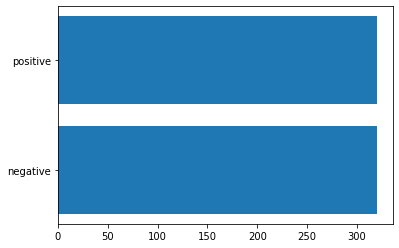

In [38]:
df_majority_OS = data_df[data_df['class'] == 1]
df_minority_OS = data_df[data_df['class'] == 0]

df_minority_upsampled = resample(df_minority_OS, replace=True, n_samples=positive_count, random_state=0)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_positive_count, oversampled_negative_count = df_upsampled['class'].value_counts()

plt.barh(["negative","positive"], [oversampled_negative_count, oversampled_positive_count])
print("NEGATIVE:  "+ str(oversampled_negative_count))
print("POSITIVE:  "+ str(oversampled_positive_count))

## Pitanja za 7.12.2022

### 1. Sta je bolje upseampling ili underseampling? 
     Mozda upseampling jer ima vise podataka obzirom da je dataset svakako mali?
### 2. Ideja: Dalja testiranja i projekat raditi sa nebalansiranim, balansiranim up i balansiranim under, pa da vidimo sta se dogadja?
### 3. Outlejeri, da li je u redu? Ako jeste, posto ih je relativno malo da li je u redu da ostanu u podacima?